In [1]:
import numpy as np
import gwcosmo
import pickle
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
event_list = ['GW150914', 'GW151226', 'GW170104', 'GW170608', 'GW170809', 'GW170814', 'GW170818', 'GW170823', 'GW190408_181802', 'GW190412', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190517_055101', 'GW190519_153544' ,'GW190521_074359', 'GW190602_175927', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190924_021846', 'GW191109_010717', 'GW191129_134029', 'GW191204_171526', 'GW191216_213338', 'GW191222_033537', 'GW200112_155838', 'GW200129_065458', 'GW200202_154313', 'GW200224_222234', 'GW200225_060421', 'GW200311_115853']#,'GW190521']


In [3]:
# file = open('../event_name.txt', 'w')
# for event in event_list:
#     file.write(event+'\n')
# file.close()

In [4]:
likelihood_broken = [0]*len(event_list)
likelihood_broken_norm = [0]*len(event_list)

In [5]:
for i in range(len(event_list)):
    likelihood_broken[i] = np.load(f'../posterior/{event_list[i]}_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)


In [6]:
Xi0_val = likelihood_broken[0]['arr_0'][0]

In [7]:
likelihood_broken_combine = 1

for i in range(len(event_list)):
    likelihood_broken_norm[i] = likelihood_broken[i]['arr_0'][1] / simps(likelihood_broken[i]['arr_0'][1], x=Xi0_val)
    likelihood_broken_combine *= likelihood_broken_norm[i]
    
likelihood_broken_combine_norm = likelihood_broken_combine / simps(likelihood_broken_combine, x=Xi0_val)


In [8]:
prior_log = gwcosmo.prior.priors.p_param(Xi0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=Xi0_val)

posterior_log_broken_combine = prior_log*likelihood_broken_combine

posterior_log_broken_combine_norm = posterior_log_broken_combine / simps(posterior_log_broken_combine, x=Xi0_val)


In [9]:
con_int_broken_flat = gwcosmo.utilities.posterior_utilities.confidence_interval(likelihood_broken_combine_norm, Xi0_val)

low_broken_flat = con_int_broken_flat.lower_level
up_broken_flat = con_int_broken_flat.upper_level
map_broken_flat = con_int_broken_flat.map

con_int_broken_log = gwcosmo.utilities.posterior_utilities.confidence_interval(posterior_log_broken_combine_norm, Xi0_val)

low_broken_log = con_int_broken_log.lower_level
up_broken_log = con_int_broken_log.upper_level
map_broken_log = con_int_broken_log.map

print('broken powerlaw flat prior')
print('Xi0 = %.2f + %.2f - %.2f'%(map_broken_flat, up_broken_flat, low_broken_flat))
print('broken powerlaw log prior')
print('Xi0 = %.2f + %.2f - %.2f'%(map_broken_log, up_broken_log, low_broken_log))

broken powerlaw flat prior
Xi0 = 1.08 + 1.69 - 0.72
broken powerlaw log prior
Xi0 = 0.95 + 1.44 - 0.65


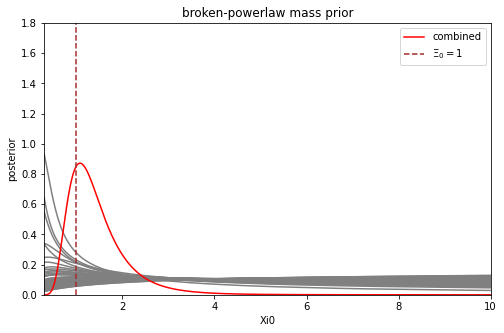

In [10]:
plt.figure(figsize=(8,5))
for i in range(len(event_list)):
    plt.plot(Xi0_val, likelihood_broken_norm[i], color='grey') #, label=event_list[i])
plt.plot(Xi0_val, likelihood_broken_combine_norm, color='r', label='combined')
plt.axvline(1, color='brown', linestyle='--', label=r'$\Xi_0=1$')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('broken-powerlaw mass prior')
plt.xlim(0.3,10)
plt.ylim(0, 1.8)
plt.legend()
# plt.savefig('../plots/posterior_Xi0_flat.pdf')

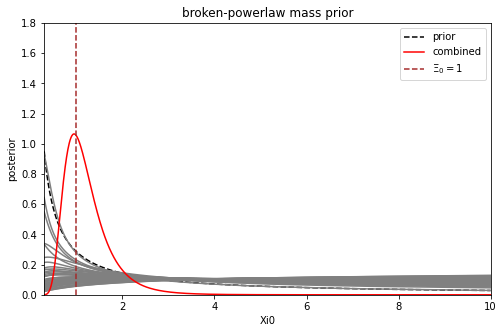

In [11]:
plt.figure(figsize=(8,5))
plt.plot(Xi0_val, prior_log_norm, linestyle='--', color='k', label='prior')
for i in range(len(event_list)):
    plt.plot(Xi0_val, likelihood_broken_norm[i], color='grey')
plt.plot(Xi0_val, posterior_log_broken_combine_norm, color='r', label='combined')
plt.axvline(1, color='brown', linestyle='--', label=r'$\Xi_0=1$')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('broken-powerlaw mass prior')
plt.xlim(0.3,10)
plt.ylim(0, 1.8)
plt.legend()

In [12]:
likelihood_gaussian = [0]*len(event_list)
likelihood_gaussian_norm = [0]*len(event_list)

In [13]:
for i in range(len(event_list)):
    likelihood_gaussian[i] = np.load(f'../posterior/{event_list[i]}_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)


In [14]:
Xi0_val = likelihood_gaussian[0]['arr_0'][0]

In [15]:
likelihood_gaussian_combine = 1

for i in range(len(event_list)):
    likelihood_gaussian_norm[i] = likelihood_gaussian[i]['arr_0'][1] / simps(likelihood_gaussian[i]['arr_0'][1], x=Xi0_val)
    likelihood_gaussian_combine *= likelihood_gaussian_norm[i]
    
likelihood_gaussian_combine_norm = likelihood_gaussian_combine / simps(likelihood_gaussian_combine, x=Xi0_val)


In [16]:
prior_log = gwcosmo.prior.priors.p_param(Xi0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=Xi0_val)

posterior_log_gaussian_combine = prior_log*likelihood_gaussian_combine

posterior_log_gaussian_combine_norm = posterior_log_gaussian_combine / simps(posterior_log_gaussian_combine, x=Xi0_val)


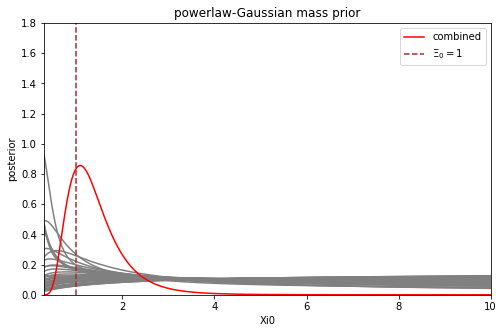

In [17]:
plt.figure(figsize=(8,5))
for i in range(len(event_list)):
    plt.plot(Xi0_val, likelihood_gaussian_norm[i], color='grey')
plt.plot(Xi0_val, likelihood_gaussian_combine_norm, color='r', label='combined')
plt.axvline(1, color='brown', linestyle='--', label=r'$\Xi_0=1$')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('powerlaw-Gaussian mass prior')
plt.xlim(0.3,10)
plt.ylim(0, 1.8)
plt.legend()

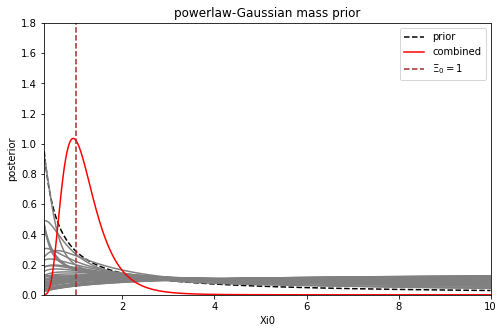

In [18]:
plt.figure(figsize=(8,5))
plt.plot(Xi0_val, prior_log_norm, linestyle='--', color='k', label='prior')
for i in range(len(event_list)):
    plt.plot(Xi0_val, likelihood_gaussian_norm[i], color='grey')
plt.plot(Xi0_val, posterior_log_gaussian_combine_norm, color='r', label='combined')
plt.axvline(1, color='brown', linestyle='--', label=r'$\Xi_0=1$')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('powerlaw-Gaussian mass prior')
plt.xlim(0.3,10)
plt.ylim(0, 1.8)
plt.legend()

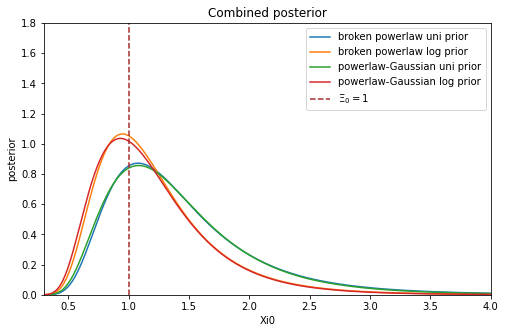

In [19]:
plt.figure(figsize=(8,5))
plt.plot(Xi0_val, likelihood_broken_combine_norm, label='broken powerlaw uni prior')
plt.plot(Xi0_val, posterior_log_broken_combine_norm, label='broken powerlaw log prior')
plt.plot(Xi0_val, likelihood_gaussian_combine_norm, label='powerlaw-Gaussian uni prior')
plt.plot(Xi0_val, posterior_log_gaussian_combine_norm, label='powerlaw-Gaussian log prior')
plt.axvline(1, color='brown', linestyle='--', label=r'$\Xi_0=1$')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('Combined posterior')
plt.xlim(0.3,4)
plt.ylim(0, 1.8)
plt.legend()

In [20]:
event_list_Finke = ['GW150914', 'GW151226', 'GW170608', 'GW190814', 'GW190924_021846']


In [21]:
likelihood_Finke = [0]*len(event_list_Finke)
likelihood_Finke_norm = [0]*len(event_list_Finke)

In [22]:
for i in range(len(event_list_Finke)):
    if event_list_Finke[i]=='GW190814':
        likelihood_Finke[i] = np.load(f'../posterior/{event_list_Finke[i]}_Xi0_broken_powerlaw_NSBH_likelihood_breakdown.npz', allow_pickle=True)
    else:
        likelihood_Finke[i] = np.load(f'../posterior/{event_list_Finke[i]}_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)


In [23]:
likelihood_Finke_combine = 1

for i in range(len(event_list_Finke)):
    likelihood_Finke_norm[i] = likelihood_Finke[i]['arr_0'][1] / simps(likelihood_Finke[i]['arr_0'][1], x=Xi0_val)
    likelihood_Finke_combine *= likelihood_Finke_norm[i]
    
likelihood_Finke_combine_norm = likelihood_Finke_combine / simps(likelihood_Finke_combine, x=Xi0_val)


In [24]:
prior_log = gwcosmo.prior.priors.p_param(Xi0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=Xi0_val)

posterior_log_Finke_combine = prior_log*likelihood_Finke_combine

posterior_log_Finke_combine_norm = posterior_log_Finke_combine / simps(posterior_log_Finke_combine, x=Xi0_val)


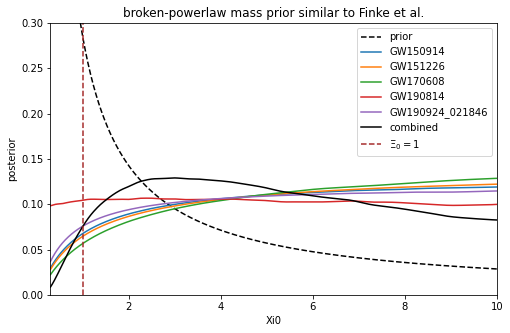

In [25]:
plt.figure(figsize=(8,5))
plt.plot(Xi0_val, prior_log_norm, linestyle='--', color='k', label='prior')
for i in range(len(event_list_Finke)):
    plt.plot(Xi0_val, likelihood_Finke_norm[i], label=event_list_Finke[i])
plt.plot(Xi0_val, posterior_log_Finke_combine_norm, color='k', label='combined')
plt.axvline(1, color='brown', linestyle='--', label=r'$\Xi_0=1$')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('broken-powerlaw mass prior similar to Finke et al.')
plt.xlim(0.3,10)
plt.ylim(0,0.3)
plt.legend()

In [26]:
con_int_Finke = gwcosmo.utilities.posterior_utilities.confidence_interval(posterior_log_Finke_combine_norm, Xi0_val)

low_Finke = con_int_Finke.lower_level
up_Finke = con_int_Finke.upper_level
map_Finke = con_int_Finke.map

print('broken powerlaw similar to Finke et al')
print('Xi0 = %.2f + %.2f - %.2f'%(map_Finke, up_Finke, low_Finke))

broken powerlaw similar to Finke et al
Xi0 = 2.99 + 7.20 - 1.40
